<h1 align=center><font size = 3>Final Assignment Introduction to Data Analytics for Business
</font></h1>
<h1 align=center><font size = 5>Kelas A11 (Kelompok 10) : CRISP-DM Customer Clustering</font></h1>



> **Daftar Anggota**

DBA2215818 - Mikael Bintang Timanta Sitepu

DBA2145529 - Saskia Nurul Jannah

DBA2238548 - Aldi Briyan Saputra

DBA2036068 - Ansheila Natasya

DBA2230837 - Dewi Meysanti

> **Daftar Isi**

* 1) Business Understanding
* 2) Data Understanding
  * 2.1 Import Library
  * 2.2 Import Data
  * 2.3 Data Loading and Exploration
  * 2.4 Exploratory Data Analysis (EDA)
* 3) Data Preparation
* 4) Modeling
  * 4.1 Elbow Method
  * 4.2 K-Means Modeling
  * 4.3 Cluster Visualization
* 5) Model Evaluation
  * 5.1 Cluster Cardinality
  * 5.2 Cluster Magnitude
  * 5.3 Silhouette Coefficient
* 6) Deployment

# Clustering CRISP-DM

> **_Clustering_** merupakan sebuah teknik dalam **_unsupervised machine learning_** yang digunakan untuk menemukan sub-kelompok atau kluster dari sebuah data yang dimiliki. 

<div align="center">
<img src="https://lh3.googleusercontent.com/-m5izE1sJN9I/WsjxVt4NAgI/AAAAAAAABRA/E7foDdEAv2A5ML4ouvkiFcCYzbvxQeOWQCLcBGAs/s640/data3d.gifwidth=30%"width=50%/>
</div>


## 1) Business Understanding

* Customer Segmentation atau Segmentasi Pelanggan adalah pembagian pasar menjadi kelompok pelanggan yang memiliki karakteristik serupa. 
* Segmentasi Pelanggan dapat menjadi sarana yang ampuh untuk mengidentifikasi kebutuhan pelanggan dengan lebih presisi. 
* Melalui dataset yang dimiliki, perusahaan dapat menggunakan kesempatan ini untuk menguasai persaingan pasar dengan mengembangkan produk dan layanan yang unik dan menarik.
* Pemilik supermarket memanfaatkan penggunaan ID Card (kartu keanggotaan) dari pelanggan-pelanggannya, sehingga ia memiliki beberapa data dasar tentang pelanggannya tersebut, seperti ID User, jenis kelamin, status perkawinan, usia, pekerjaan, jumlah pendapatan tahunan, dan ukuran kota tempat tinggal pelanggan. 
* Dengan menggunakan data dasar yang diperoleh dari ID Card pelanggan tersebut, pemilik supermarket ingin memahami target pelanggan sehingga informasi ini kemudian dapat diberikan kepada tim pemasaran untuk merencanakan strategi yang lebih spesifik dan sesuai.



*   Tujuan Bisnis :
Mengenali pola data target pelanggan untuk mengetahui produk yang dibutuhkan pelanggan.
*   Menilai Situasi :
Pada mal supermarket memiliki pelanggan yang berbeda usia, jenis kelamin, pendapatan dan kebutuhan yang berubah, sehingga perlu dilakukan prediksi sebagai pertimbangan bagi tim pemasaran dalam perencanaan strategi penjualan produk, dan untuk pelanggan agar tetap nyaman serta puas ketika berbelanja. 
*   Tujuan Data Mining :
Menggali pengetahuan tentang pola total target pelanggan di mal supermarket.

## 2) Data Understanding



*   Pengumpulan data dilakukan dengan ekplorasi dataset yang bersifat publik yang ada di internet. Dataset yang digunakan ialah dataset mengenai _**Customer Segmentation**_ yang diperoleh melalui situs _**Kaggle**_. 

* Link dataset _**Customer Segmentation**_ 
https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv

*   Dalam dataset ini terdiri dari informasi tentang perilaku pembelian 2.000 individu dari area tertentu saat memasuki toko fisik 'FMCG'. Semua data telah dikumpulkan melalui ID card (kartu keanggotaan) yang mereka gunakan saat melakukan pembelian.


### Import Library

In [ ]:
from pprint import pprint
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

### Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_segmentation = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/segmentation data.csv")

### Data Loading and Exploration

In [ ]:
#untuk memperoleh informasi mengenai jumlah baris x kolom dari dataset 

df_segmentation.shape 

(2000, 8)

In [ ]:
#untuk memperoleh informasi 5 data teratas dari dataset 

df_segmentation.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
#untuk memperoleh informasi dari dataset seperti informasi mengenai missing value, tipe data tiap fitur dan lain sebagainya.

df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


> Insights:

* Terdapat sebanyak **2000 customer** yang diobservasi dengan **fiturnya sebanyak 8**.
* Tidak terdapat _missing values_.


* Categorical features dari data yang dimiliki ada sebanyak 5 yaitu  `Sex`, `Marital status`, `Education`, `Occupation` dan `Settlement size`.
* Numerical features dari data yang dimiliki ada sebanyak 3 yaitu `ID`, `Age` dan `Income`.
* Fitur `ID` tidak digunakan dalam analisis pada dataset ini.
* Seluruh tipe data adalah integer, namun untuk categorical features, digunakan indeks angka. Berikut disajikan informasi indeks angka dari masing-masing categorical features.

Tabel keterangan setiap fitur:

| Variable | Data Type | Range | Description |
| --- | --- | --- | --- |
| ID | numerical | Integer | Nomor unik yang dapat mengidentifikasi pelanggan. |
| Sex | categorical | {0,1} | Gender pelanggan. |
| Marital status | categorical | {0,1} | Status perkawinan pelanggan.|
| Age | numerical | Integer | Umur pelanggan saat dataset diambil. |
| Education | categorical | {0,1,2,3} | Tingkatan pendidikan pelanggan. |
| Income | numerical | Real | Jumlah pendapatan tahunan pelanggan dalam US Dollar. |
| Occupation | categorical | {0,1,2} | Kategori pekerjaan pelanggan. |
| Settlement size | categorical | {0,1,2} | Ukuran kota hunian pelanggan |

> **Arti indeks angka dari categorical features**

**Sex:**

*   0 = Laki-laki
*   1 = Perempuan

**Marital status:**

*   0 = Lajang
*   1 = Non-Lajang (Cerai/Menikah/Janda/Duda)

**Education:**


*   0 = Tidak Sekolah
*   1 = SMA
*   2 = Kuliah
*   3 = Lulus

**Occupation:**


*   0 = Pengangguran
*   1 = Karyawan
*   2 = Wirausahawan

**Settlement size:**

* 0 = Kecil
* 1 = Sedang
* 2 = Besar

In [ ]:
#untuk melihat jumlah unique values (jenis kategori label di tiap fitur)

for feature in df_segmentation.columns:
    print(
        f"- num of unique values in `{feature}`:",
        df_segmentation[feature].nunique()
    )

- num of unique values in `ID`: 2000
- num of unique values in `Sex`: 2
- num of unique values in `Marital status`: 2
- num of unique values in `Age`: 58
- num of unique values in `Education`: 4
- num of unique values in `Income`: 1982
- num of unique values in `Occupation`: 3
- num of unique values in `Settlement size`: 3


> Insights:

* Diperoleh untuk kategori `ID` tentu semuanya merupakan unique value karena ID Card tiap user berbeda-beda.
* Fitur dengan unique value paling sedikit yaitu `Sex` dan `Marital Status`, sebanyak 2 value.

### Exploratory Data Analysis

Pada tahap sebelumnya, diperoleh informasi tipe data untuk semua feature adalah integer. Padahal, untuk categorical features sendiri merupakan object bukan integer. Sehingga dilakukan pendefinisian ulang di tiap categorical features menggunakan informasim tiap indeks categorical features yang telah didefinisikan sebelumnya.

In [ ]:
#Mula-mula dibuat copy dari dataset yang dimiliki

df_segmentation_real_values = df_segmentation.copy()

In [ ]:
# Untuk Mengganti numerical values dengan real values pada categorical features

df_segmentation_real_values['Education'] = df_segmentation_real_values['Education'].map({0:'Tidak Sekolah', 1:'SMA', 2:'Kuliah', 3:'Lulus'})

df_segmentation_real_values['Sex'] = df_segmentation_real_values['Sex'].map({0: 'Laki-laki' , 1: 'Perempuan'})

df_segmentation_real_values['Marital status'] = df_segmentation_real_values['Marital status'].map({0: 'Lajang' , 1: 'Non-Lajang'})

df_segmentation_real_values['Occupation'] = df_segmentation_real_values['Occupation'].map({0: 'Pengangguran' , 1: 'Karyawan', 2:'Wirausahawan'})

df_segmentation_real_values['Settlement size'] = df_segmentation_real_values['Settlement size'].map({0: 'Kecil' , 1: 'Sedang', 2:'Besar'})

In [ ]:
#akan dilihat sampel apakah categorical values sudah memiliki real values sesuai indeksnya masing-masing

df_segmentation_real_values.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
711,100000712,Perempuan,Non-Lajang,35,SMA,106515,Karyawan,Besar
1449,100001450,Perempuan,Lajang,21,SMA,100591,Pengangguran,Kecil
1772,100001773,Perempuan,Lajang,32,Tidak Sekolah,68347,Pengangguran,Kecil
357,100000358,Laki-laki,Lajang,26,Tidak Sekolah,153586,Wirausahawan,Besar
1016,100001017,Laki-laki,Lajang,64,Kuliah,130492,Karyawan,Besar


Dapat dilihat untuk categorical features sekarang telah memiliki real values yang sudah sesuai.

Selanjutnya setiap features dikelompokkan sesuai tipe nya yaitu numerical dan categorical untuk memperoleh informasi dan membuat visualisasi yang lebih mudah dan cepat berdasarkan tipe featuresnya tersebut.

In [ ]:
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']

df_segmentation[cat_columns] = df_segmentation[cat_columns].astype('str')

In [ ]:
#Summary statistics dari categorical features

df_segmentation_real_values.describe(include='object').T

,count,unique,top,freq
Sex,2000,2,Laki-laki,1086
Marital status,2000,2,Lajang,1007
Education,2000,4,SMA,1386
Occupation,2000,3,Karyawan,1113
Settlement size,2000,3,Kecil,989


> Insights:

Dapat dilihat untuk masing-masing top values atau modus dari tiap categorical features pada kasus data yang dimiliki ialah:
* `Sex` atau jenis kelamin customer terbanyak adalah `laki-laki`.
* `Marital status` atau status perkawinan terbanyak customer adalah orang-orang yang masih `lajang`.
* `Education` atau jenjang pendidikan customer terbanyak ialah `siswa SMA`.
* `Occupation` atau pekerjaan customer terbanyak adalah seorang `Karyawan`.
* `Settlement size` atau daerah tempat tinggal terbanyak dari customer adalah `kota-kota kecil`.

In [ ]:
#Summary statistics dari numerical features

df_segmentation.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


Selanjutnya dilakukan visualisasi menggunakan fungsi yang didefinisikan terlebih dahulu.

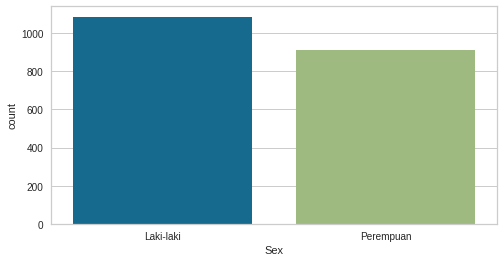

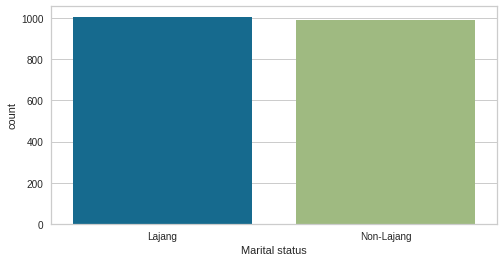

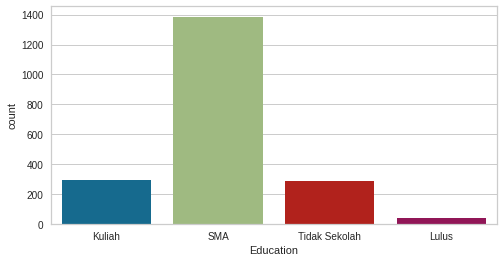

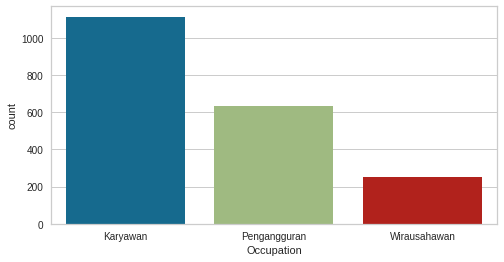

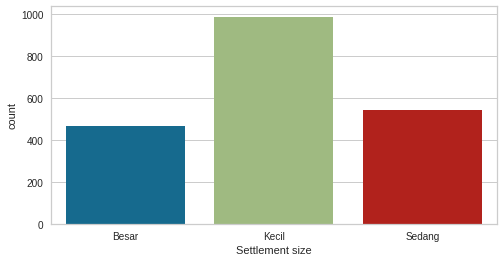

In [ ]:
for category in cat_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_segmentation_real_values, x=category)

> Dari **visualiasi Categorical Features** di atas diperoleh:

**Sex**

* Terlihat bahwa Pelanggan terbanyak adalah Laki-laki (1086/2000) = 54%
* Sedangkan perempuan paling sedikit (914/2000) dengan persentase = 46%

**Marital status**

* Pelanggan dengan status Lajang dan Non Lajang (Cerai/Menikah/Janda/Duda) hampir sama yaitu sebanyak :
* Lajang = (1007/2000)
* Non-Lajang (Cerai/Menikah/Janda/Duda) = (993/2000)

**Education**

* Terlihat bahwa Mayoritas Pelanggan memiliki tingkat pendidikan SMA (1386/2000)
* Sedangkan pelanggan yang sudah lulus adalah yang paling sedikit hanya (36/2000).

**Occupation**

* Terlihat juga bahwa Mayoritas jenis pekerjaan pelanggan adalah karyawan (1113/2000)
* Di peringkat kedua adalah Pengangguran sebanyak (633/2000). Pengangguran ini adalah Ibu rumah tangga atau anak-anak ataupun yang lainnya.
* Pelanggan Wiraswasta adalah yang paling sedikit di sini yaitu sebanyak (254/2000).

**Settlement size**

* dari visualisasi di atas di ketahui bahwa Pelanggan yang tinggal di Permukiman Kecil Ini hampir 50%.
* kita dapat melihat dengan jelas bahwa pelanggan permukiman kecil adalah mayoritas yang sebanyak (989/2000).

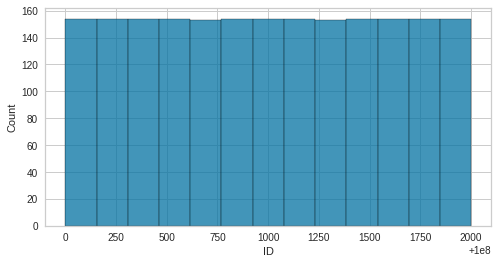

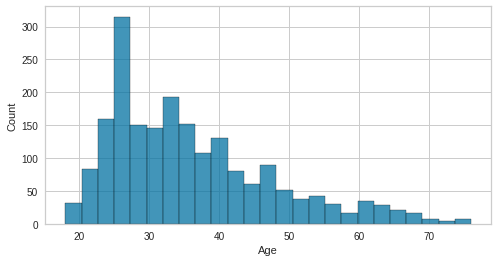

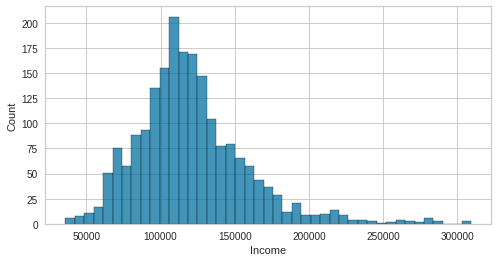

In [ ]:
for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_segmentation, x=numerical)
    plt.savefig(numerical + '.png')

> Dari **visualiasi Numerical Features** di atas diperoleh:

**Age**

* Diketahui bahwa pelanggan berusia 18 hingga 76 tahun.
* Sebagian besar pelanggan yang paling banyak melakukan pembelian adalah berusia antara 20 dan 64 tahun.

**Income**

* Terlihat Sebagian besar penghasilan dari pelanggan berkisar 35.8K hingga 309.3K Dolar.

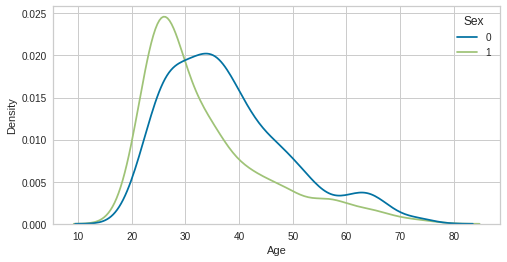

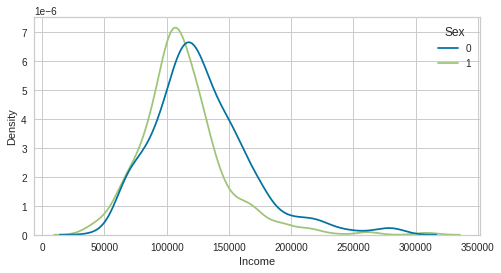

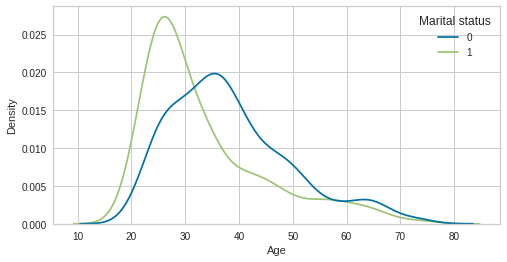

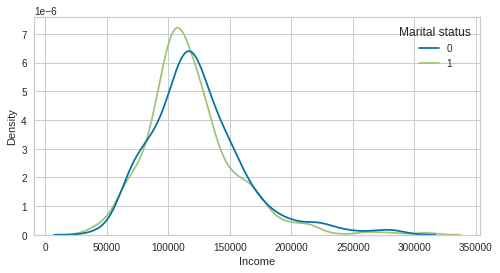

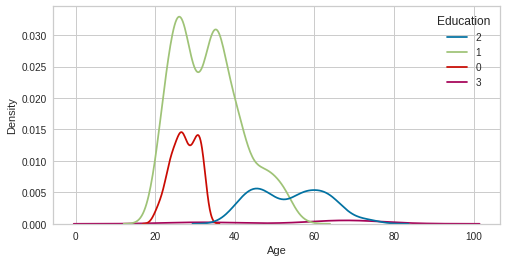

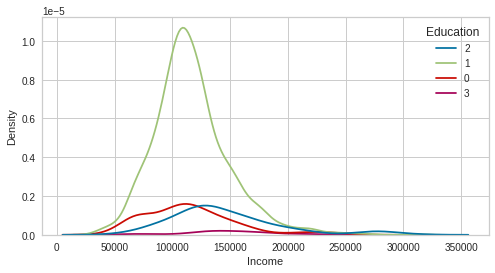

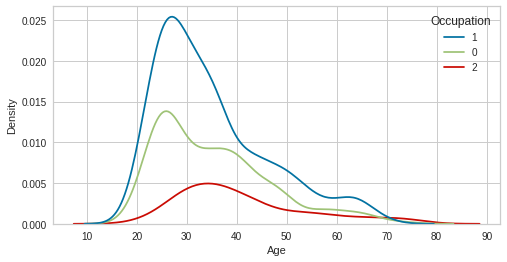

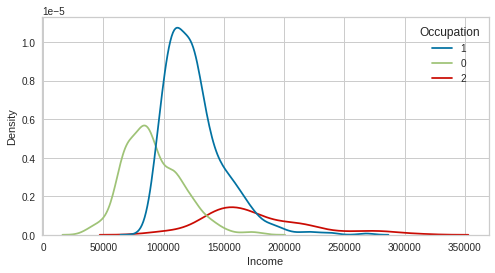

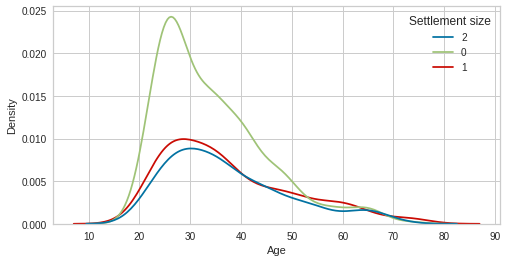

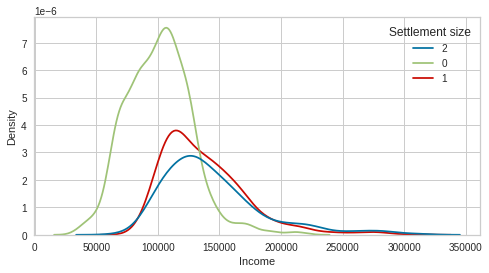

In [ ]:
for category in cat_columns:
    for numerical in num_columns:
        if numerical != 'ID':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=df_segmentation, x=numerical, hue=category) 

In [ ]:
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

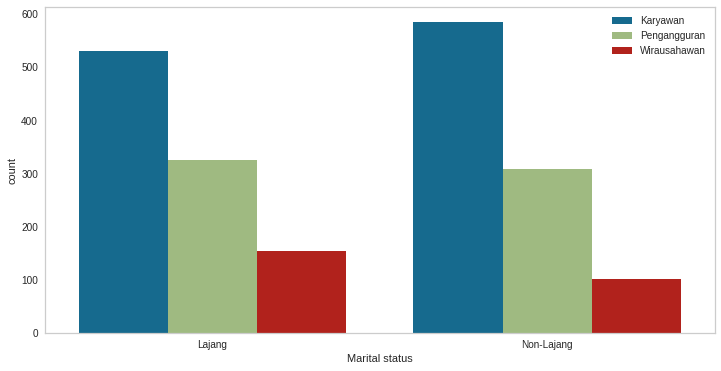

In [ ]:
plot_count(x="Marital status", hue="Occupation", data=df_segmentation_real_values, figsize=(12, 6))
plt.legend(loc="upper right")
plt.show()

> 
* Mayoritas pelanggan yang berstatus Lajang dan Non-Lajang bekerja sebagai Karyawan.


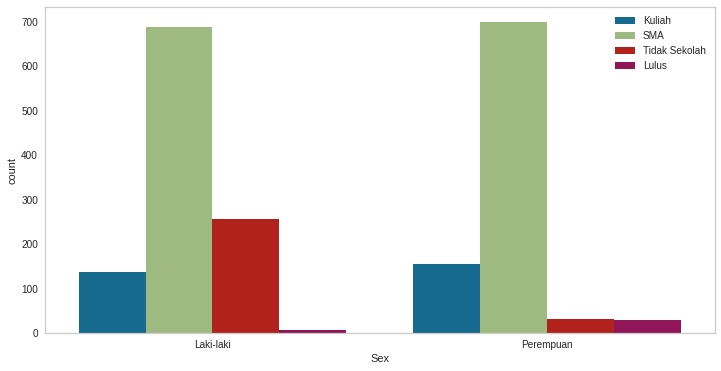

In [ ]:
plot_count(x="Sex", hue="Education", data=df_segmentation_real_values, figsize=(12, 6))
plt.legend(loc="upper right")
plt.show()

>  
* Sebagian besar tingkat pendidikan laki-laki adalah SMA.
* Sebagian besar tingkat pendidikan perempuan adalah SMA juga.
* Pelanggan Laki-laki lebih banyak yang tidak sekolah dibandingkan dengan perempuan.

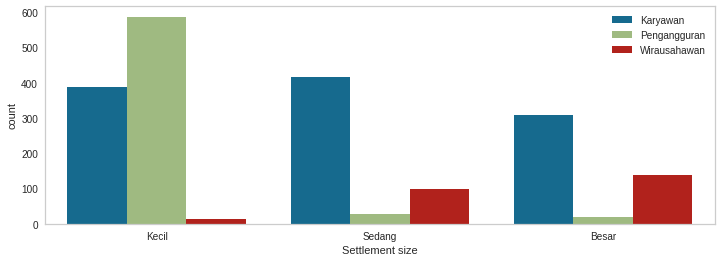

In [ ]:
plot_count(x="Settlement size", hue="Occupation", data=df_segmentation_real_values, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

>
* Pelanggan yang pengangguran cenderung tinggal di kota-kota kecil.
* Dan sebaliknya Pelanggan yang wirausahawan cenderung tinggal di kota-kota besar.

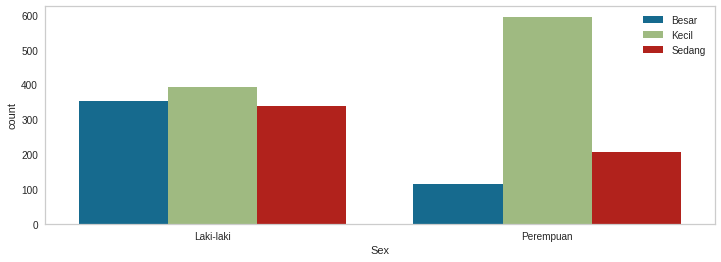

In [ ]:
plot_count(x="Sex", hue="Settlement size", data=df_segmentation_real_values, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

> 
* Mayoritas pelanggan Wanita cendurung tinggal di kota-kota kecil
* berbeda dengan wanita, pelanggan laki-laki hampir tersebar secara merata di kota besar, kecil maupun sedang.

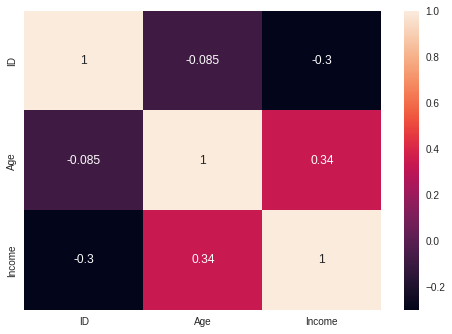

In [ ]:
# Visualisasi hubungan antara variabel numerik pada df_segmentation
sns.heatmap(df_segmentation.corr(), annot=True)
plt.show()

## 3) Data Preparation



Persiapan data yang akan kita lakukan adalah:
* memilih kolom yang akan dijadikan feature
* melakukan standardisasi semua fitur yang sudah dipilih




In [ ]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   object
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


Selanjutnya kembali dikelompokkan masing-masing features berdasarkan tipe datanya, yaitu categorical dan numerical. Pada tahapan data preparation ini fitur ID dikategorikan kedalam categorical.

In [ ]:
categorical = ['ID', 'Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
numerical = ['Age', 'Income']

Sehingga seluruh features kecuali Age dan Income akan diubah menjadi object.

In [ ]:
for feature in categorical:
  df_segmentation[feature] = df_segmentation[feature].astype("object")

Dicek kembali apakah tipe data sudah sesuai untuk digunakan pada pemodelan.

In [ ]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   object
 1   Sex              2000 non-null   object
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   object
dtypes: int64(2), object(6)
memory usage: 125.1+ KB


Kolom yang akan digunakan sebagai feature adalah semua kolom kecuali kolom ID User yang tidak digunakan dalam analisis kali ini.

In [ ]:
df_features = df_segmentation.copy()
df_features.drop(columns = 'ID', inplace = True)

Dicek kembali apakah kolom ID User sudah hilang atau belum.

In [ ]:
df_features.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


Selanjutnya untuk tahap modeling, kelompok kami akan menggunakan model **K-means clustering** untuk mengelompokkan data berdasarkan _centroid_-nya.

Mengingat nilai di tiap feature memiliki rentang nilai yang beragam, disini kami akan menggunakan fungsi StandardScaler untuk standarisasi nilai tersebut

In [ ]:
scaler = StandardScaler()
scaler.fit(df_features)
df_scaled = pd.DataFrame(scaler.transform(df_features),columns=df_features.columns)
df_scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


## 4) Modeling

### Elbow Method

Untuk menentukan nilai k yang akan digunakan pada KMeans model, kami menggunakan elbow method untuk mencari jumlah cluster yang optimal berdasarkan nilai inertia nya.

Kami akan mencoba beberapa nilai k (jumlah cluster) untuk dihitung nilai inertia-nya. Kemudian, kami akan buat visualisasi tren nilai inertia untuk masing-masing nilai k. Jumlah cluster yang optimal ditentukan secara visual dengan mencari bentuk siku elbow pada plot setelah inertia mulai menurun secara linier. (ref)

Untuk mempermudah, kami menggunakan function KElbowVisualizer untuk menentukan nilai k.

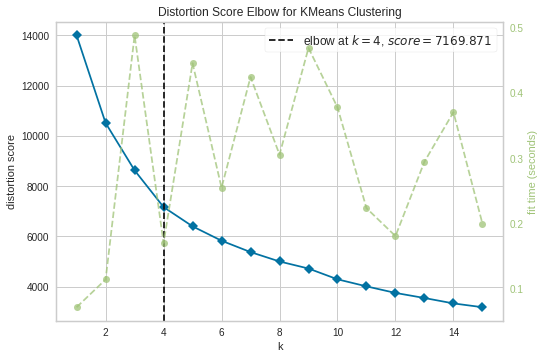

In [ ]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,16))

visualizer.fit(df_scaled)
visualizer.show()

Berdasarkan grafik diatas, nilai k yang optimal adalah k=4. Maka dari itu kami akan membangun model KMeans menggunakan nilai k=4.

### K-Means Modeling

In [ ]:
K = 4
kmeans_4 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_4.fit(df_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.149s


Selanjutnya, kami akan membuat kolom baru pada data feature yang merepresentasikan cluster dari model tersebut.

In [ ]:
cluster = df_features.assign(
    clusters=kmeans_4.predict(df_scaled)
)

cluster.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


Oleh karena jumlah fitur yang cukup banyak, kami tidak bisa membuat visualisasi dalam bentuk 2 dimensi.

Kami akan coba menggunakan beberapa pasang fitur yang ada menggunakan pairplot dari Seaborn.

In [ ]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              2000 non-null   object
 1   Marital status   2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Education        2000 non-null   object
 4   Income           2000 non-null   int64 
 5   Occupation       2000 non-null   object
 6   Settlement size  2000 non-null   object
 7   clusters         2000 non-null   int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 117.3+ KB


### Cluster Visualization

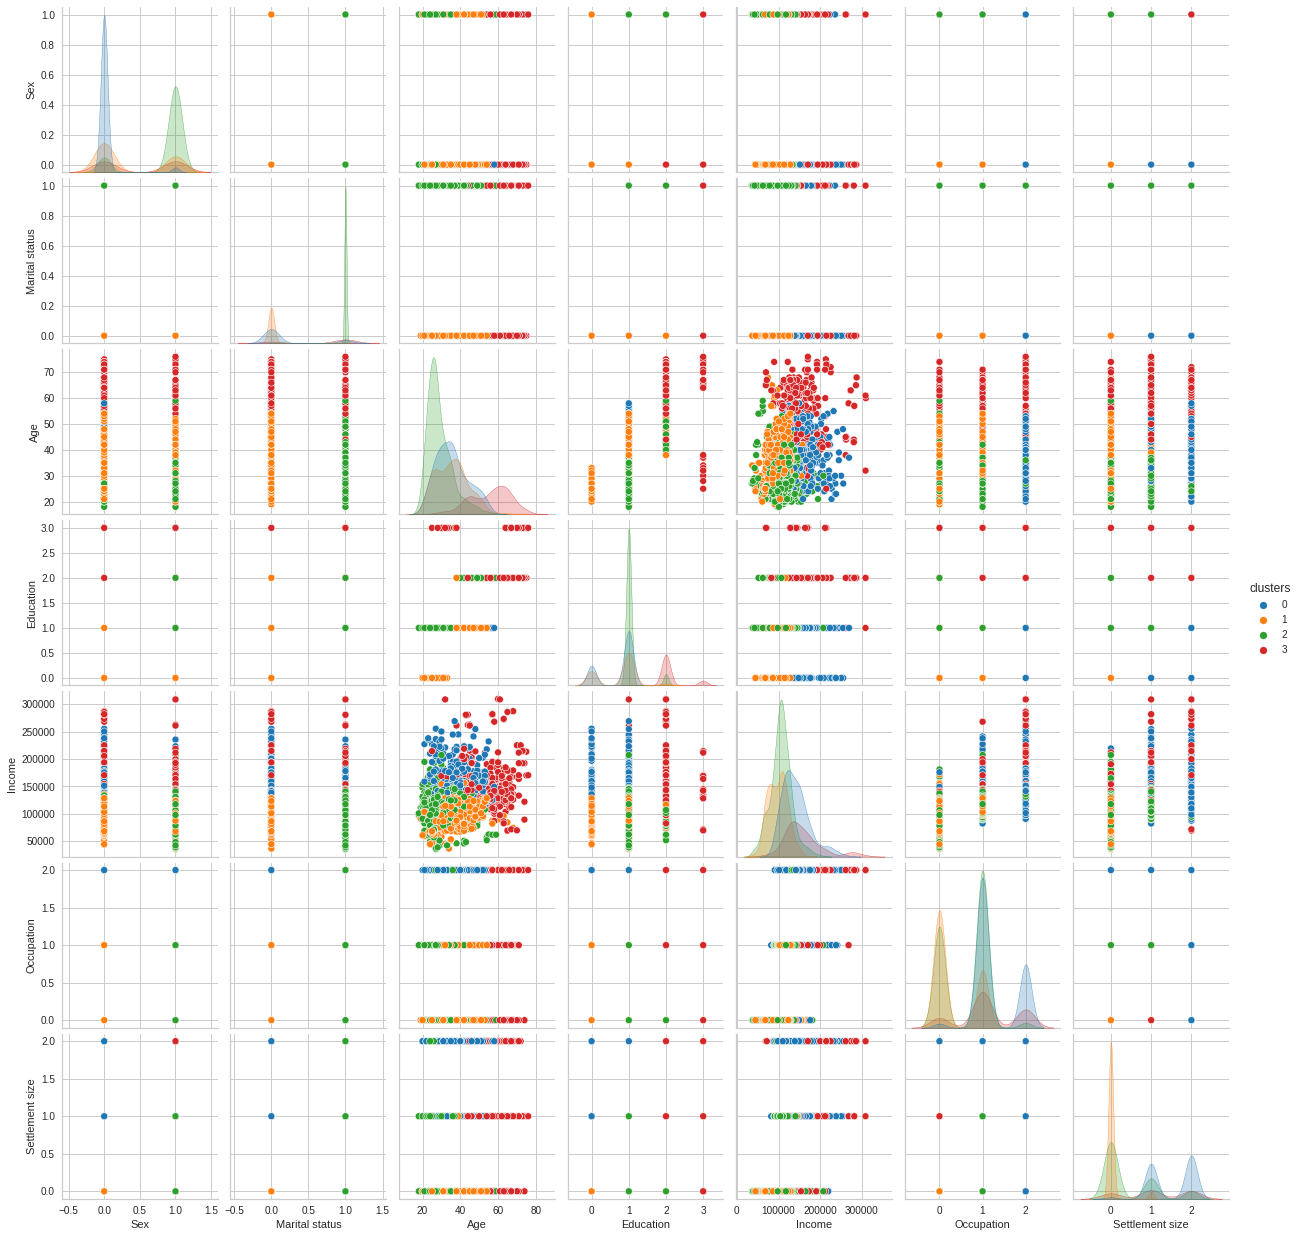

In [ ]:
viz = cluster.copy()
for feature in list(viz.columns.values):
  viz[feature] = viz[feature].astype('int64')
sns.pairplot(viz, hue="clusters", palette="tab10")
plt.show()

## 5) Model Evaluation

Pada tahap evaluasi model, kita akan coba menganalisis cardinality dan magnitude dari masing-masing clusters (K=4)

### Cluster Cardinality

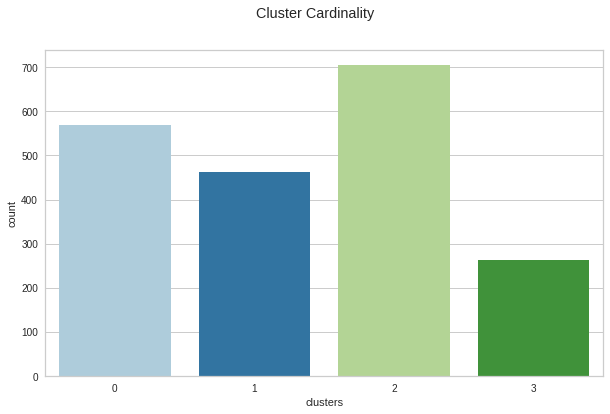

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='clusters', data=cluster, palette="Paired")
plt.suptitle("Cluster Cardinality")
plt.show()

Model dengan jumlah cluster 4 (k=4), merupakan data clustering yang tidak memiliki perbedaan nilai kardinalitas yang ekstrim antar cluster 0 dan 1 dengan cluster 2 dan 3

### Cluster Magnitude

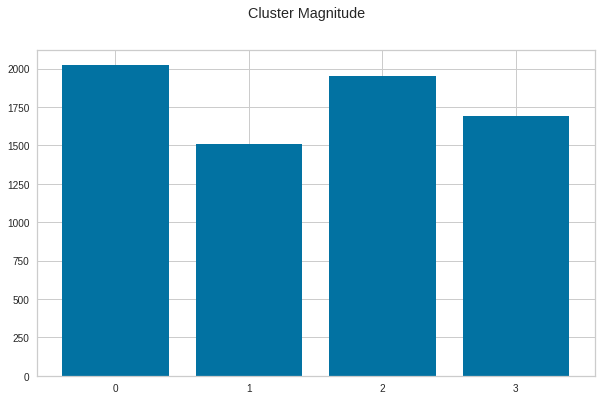

In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(10, 6))
ax, model, name = [axis, kmeans_4, 'kmeans_4']
distances = model.transform(df_scaled)
preds = model.predict(df_scaled)
inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
  for cluster in range(model.n_clusters)])
ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
plt.xticks([0,1,2,3])
plt.suptitle("Cluster Magnitude")
plt.show()

Berdasarkan grafik diatas maka nilai k means 4 secara jarak/ magnitude dapat ditoleransi karena perbedaan nilai pada setiap data tidak terlalu signifikan

### Slihouette Coefficient

Berikut nilai dari silhouette score yang diperoleh dari model ini.

In [ ]:
silhouette_scores = []
model = KMeans(n_clusters=4, random_state=11)
model.fit(df_scaled)
silhouette_scores.append(silhouette_score(df_scaled, model.labels_))

print(f'Nilai dari silhouette scores untuk model KMeans dengan nilai k = 4 adalah {silhouette_scores[0]}')

Nilai dari silhouette scores untuk model KMeans dengan nilai k = 4 adalah 0.26879180394522123


## 6) Deployment

Penyebaran (deployment) berupa laporan kepada tim pemasaran sebagai pertimbangan dalam menyusun strategi untuk penjualan produk. 